In [1]:
import pandas as pd
import numpy as np

In [30]:
my_file = pd.read_csv('spatial.csv')
my_file.head()

,Frame Number,Person Count,Activity Indicator,Seconds
0,0,0,False,0.000000
1,1,6,True,0.000000
2,2,6,True,0.066733
3,3,6,True,0.133467
4,4,5,True,0.200200


In [31]:
def extract_Person(row):
    return row['Person Count']
def extract_Active_Frame(row):
    return row['Activity Indicator']
def extract_Frame_Number(row,Person):
    if row['Person Count'] == Person:
        return int(row['Frame Number'])

In [32]:
Person_col = my_file['Person Count']
Max_people = Person_col.max(axis=0)
Min_people = Person_col.min(axis=0)
Active_Frames = my_file['Activity Indicator']
Total_Frames = len(my_file)

In [41]:
Busiest_Frames = my_file.apply(extract_Frame_Number,axis=1, args=[Max_people])
Busiest_Frames.dropna(inplace=True)
Busiest_Frames = Busiest_Frames.to_numpy(dtype=int)
Busiest_Frames

array([185, 202])

In [69]:
import cv2

# Get 5 Busiest Frames in the processed videos
reader = cv2.VideoCapture('../videos/processed/my_video_feed.avi') # The Processed Video frames written by Thread-1
Images = []
for frame in Busiest_Frames:
    reader.set(cv2.CAP_PROP_POS_FRAMES,frame)
    Images.append(reader.read())

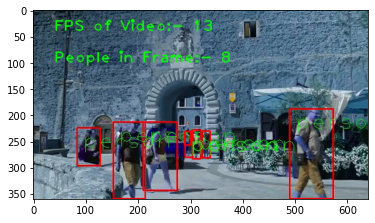

In [81]:
## Plotting Busiest Frame in Whole video process ##
import matplotlib.pyplot as plt

plt.imshow(Images[0][1].astype('int'),cmap='Dark2_r')

In [83]:
# Calculating Ideal time and Active Time